# Итоговая работа по курсу «Python и математика для анализа данных»

## Список задач

Проектная работа по модулю “Математика и статистика в Python”
1. Загрузить файл hr.csv.
2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).
3. Рассчитать и визуализировать корреляционную матрицу для переменных.
4. Визуализировать несколько взаимосвязей между переменными.
5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными.
6. Рассчитать сколько работников работает в каждом департаменте.
7. Показать распределение сотрудников по зарплатам.
8. Показать распределение сотрудников по зарплатам совместно с департаментами.
9. Сколько сотрудников покинули компанию.
10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.
11. Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в Личном кабинете

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pandas_profiling
import seaborn as sns
import statistics as stats
%matplotlib inline

## Загрузить файл hr.csv

In [2]:
from IPython.display import Image

In [3]:
dataset = pd.read_csv('HR.csv')

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


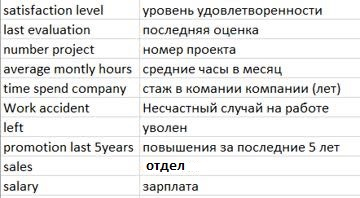

In [5]:
Image("description.jpg")

In [6]:
dataset.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение)

### basic

In [7]:
dataset.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [8]:
dataset.median()

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

In [9]:
dataset.select_dtypes(include='object').mode()

,sales,salary
0,sales,low


In [10]:
dataset.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


### cat contributions

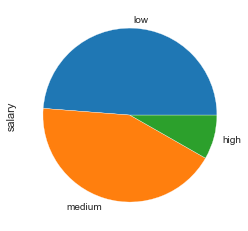

In [11]:
dataset.salary.value_counts().plot(kind='pie')

In [12]:
dataset.salary.value_counts(normalize=True).round(4)*100

low       48.78
medium    42.98
high       8.25
Name: salary, dtype: float64

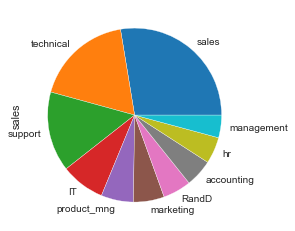

In [13]:
dataset.sales.value_counts().plot(kind='pie')

In [14]:
len(dataset.sales.unique())

10

In [15]:
dataset.sales.value_counts(normalize=True).round(4)*100

sales          27.60
technical      18.13
support        14.86
IT              8.18
product_mng     6.01
marketing       5.72
RandD           5.25
accounting      5.11
hr              4.93
management      4.20
Name: sales, dtype: float64

### pandas profile report

In [16]:
dataset.profile_report()

## Рассчитать и визуализировать корреляционную матрицу для переменных

In [17]:
corr_matrix = dataset.corr()
corr_matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


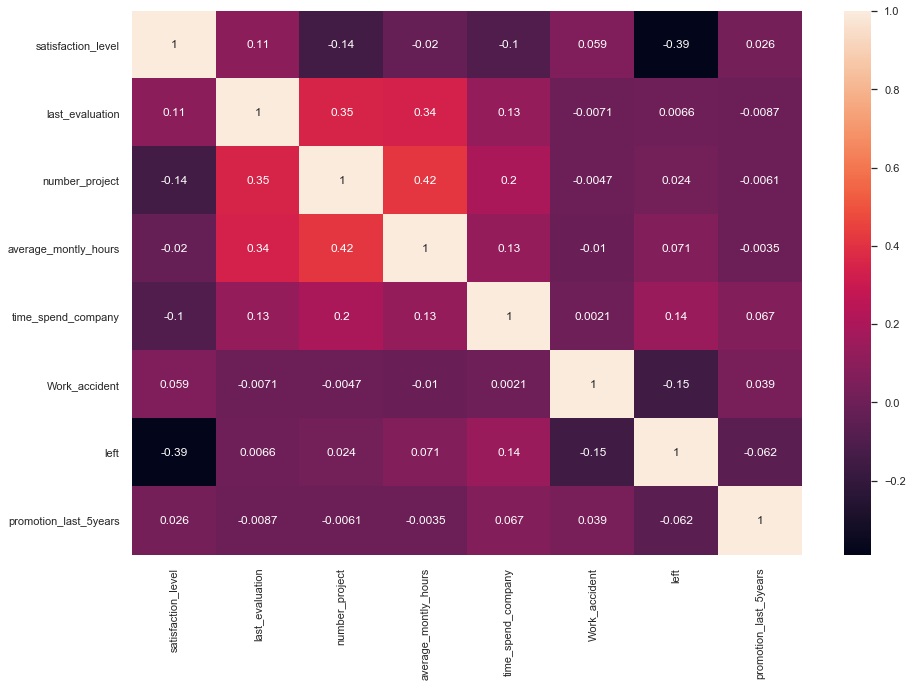

In [18]:
sns.set(rc=({'figure.figsize':(15, 10)}))
sns.heatmap(corr_matrix, annot=True, xticklabels=corr_matrix.columns.values, yticklabels=corr_matrix.columns.values)

## Визуализировать несколько взаимосвязей между переменными

In [ ]:
sns.pairplot(dataset,vars=['number_project', 'last_evaluation', 'average_montly_hours', 'satisfaction_level', 'left'], kind="scatter")

## С использованием t-test статистики проверить взаимосвязи между несколькими переменными

## Рассчитать сколько работников работает в каждом департаменте

## Показать распределение сотрудников по зарплатам

## Показать распределение сотрудников по зарплатам совместно с департаментами

## Сколько сотрудников покинули компанию

## Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию